In [13]:
from ast import Interactive
from builtins import list
from locale import normalize
from re import S, X
from cProfile import label
import pickle
from bs4 import ResultSet
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from env import *
from models.qr_one import Qroute
from models.dqnn import *
from tqdm import tqdm

In [2]:
# map dragonfly network
adj = [[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], 
    [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 
    [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0], 
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1], 
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0], 
]

In [3]:
# generate network
network = Network(adj, drop=False)
# network.print_network()
# network.print_node_info()

duration = 10000
slot = 1
loads = [1, 5, 10]

# Run under uniform traffic

## Using Deep Q Routing

## Deep Q Routing Training

### Pretraining data

In [5]:
network.bind(Qroute(network, memory_capa=50000))
network.agent.epsilon = 0
network.agent.load(f"dump_dragonfly/uniform/qroute/13.0.pkl")
    
result = network.train_one_load(50000, 8, lr={'q': 0.4}, adv=False)
network.reset()

m = network.agent.memory
print(m)

100%|██████████| 50000/50000 [01:01<00:00, 809.76it/s]


[[ 0.  0.  0. ...  0.  9.  1.]
 [ 0.  0.  0. ...  0.  7.  0.]
 [ 0.  0.  0. ...  0. 22.  1.]
 ...
 [ 0.  0.  0. ...  0.  3.  0.]
 [ 0.  0.  0. ...  0. 18.  1.]
 [ 0.  0.  0. ...  0.  9.  1.]]


### Build Neural Network

In [6]:
agent = DRL(network, static=False)
network.bind(agent)
network.reset()

net = DQN(36, 3, 8)
network.agent.build_model(net, net)

lr = 5e-3
network.agent.reset_optimizer(lr)
network.agent.config.memory_capacity = 50000
network.agent.config.batch = 64
network.agent.build_memory()

print(network.agent)

Network Topology Information
Number of Node: 36
Input dimension 3
-----------------------------------
Hyper Parameter
Learning rate: 4e-05
Reward_decay: 0.99
Memory capacity: 50000
Batch size: 64
Tau: 0.05
-----------------------------------
Memory shape (50000, 220)
-----------------------------------
Network shape DQN(
  (fc1): Linear(in_features=108, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=36, bias=True)
)
-----------------------------------
Optimizer Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.005
    maximize: False
    weight_decay: 0
)
-----------------------------------


### Pretraining

In [7]:
pre_time = 1000000
network.agent.pre_training(m, pre_time)
network.agent.store(f"dump_dragonfly/uniform/dqn/pre5000")


100%|██████████| 1000000/1000000 [46:24<00:00, 359.10it/s]


### Training

In [20]:
for load in loads:
    network.reset()
    network.agent.load(f"dump_dragonfly/uniform/dqn/pre5000")
    result = network.train(duration=duration, slot=slot, lambd=load)
    network.agent.store(f'dump_dragonfly/uniform/dqn/test{load}')
    # Training is done by using the trained policy of the previous load, this is only demostration
    print(f"load {load} finished")

100%|██████████| 10000/10000 [00:18<00:00, 540.10it/s]


load 1 finished


100%|██████████| 10000/10000 [00:28<00:00, 350.71it/s]


load 5 finished


100%|██████████| 10000/10000 [00:40<00:00, 247.36it/s]

load 10 finished


### Testing

In [9]:
agent = DRL(network, static=True)
network.bind(agent)
network.reset()

net = DQN(36, 3, 8)
network.agent.build_model(net, net)

lr = 5e-3
network.agent.reset_optimizer(lr)
network.agent.config.memory_capacity = 50000
network.agent.config.batch = 64
network.agent.build_memory()

print(network.agent)

Network Topology Information
Number of Node: 36
Input dimension 3
-----------------------------------
Hyper Parameter
Learning rate: 4e-05
Reward_decay: 0.99
Memory capacity: 50000
Batch size: 64
Tau: 0.05
-----------------------------------
Memory shape (50000, 220)
-----------------------------------
Network shape DQN(
  (fc1): Linear(in_features=108, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=36, bias=True)
)
-----------------------------------
Optimizer Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.005
    maximize: False
    weight_decay: 0
)
-----------------------------------


In [23]:
results = dict()
for load in loads:
    network.reset()
    network.agent.load(f"dump_dragonfly/uniform/dqn/l13") # Load trained policy
    result = network.train(duration=duration, lambd=load, slot=slot, adv=False)
    results[load] = result['route_time']
    print(f"load {load} completed with result {result['route_time'][-1]}")

100%|██████████| 10000/10000 [00:03<00:00, 2518.28it/s]


load 1 completed with result 2.5490547263681593


100%|██████████| 10000/10000 [00:18<00:00, 533.73it/s]


load 5 completed with result 3.0425281861280427


100%|██████████| 10000/10000 [00:36<00:00, 274.60it/s]

load 10 completed with result 4.958447667581341


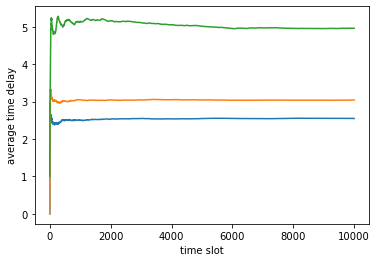

In [24]:
plt.xlabel("time slot")
plt.ylabel("average time delay")
dql = pd.DataFrame(results)
plt.plot(dql)
plt.show()